In [2]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [11]:

job_data = {
    'job_id': [1,2,3,4,5],
    'job_title': ['Data Scientist', 'Software Engineer', 'Product Manager', 'Marketing Ditrector', 'HR Manager'],
    'company_name': ['Google', 'Microsoft', 'Apple', 'Nike', 'Herschel'],
    'job_location': ['Mountain View, CA', 'Redmond, WA', 'Cupertino, CA','Beaverton, OR', 'Seattle, WA']
}

company_data = {
    'company_name': ['Google', 'Microsoft', 'Apple', 'Nike', 'Starbucks'],
    'industry': ['Technology', 'Technology', 'Technology', 'Apparel', 'Food & Beverage'],
    'company_size': ['100,000+', '100,000+', '100,000+', '75,000+', '346,000+']
}

#here I sould really type DataFrame because python as I know is case sensitive
df_job = pd.DataFrame(job_data)
df_company = pd.DataFrame(company_data)

df_job_company = df_job.merge(df_company, on = 'company_name')


In [59]:
#Filtering the list for a condition 'job_country' == 'US'
df_us = df[df['job_country'] == 'United States'].copy()
df_us['job_posted_month'] = df_us['job_posted_date'].dt.strftime('%B')
#pd.to_datetime(df_us['job_posted_date'], format='%B').dt.month

In [60]:
#Creating pivot table out of df_us
df_us_pivot = df_us.pivot_table(index = 'job_posted_month', columns = 'job_title_short', aggfunc = 'size')
df_us_pivot = df_us_pivot.reset_index()
df_us_pivot

job_title_short,job_posted_month,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
0,April,565,40,6049,2801,4867,51,1025,781,991,112
1,August,903,39,6634,3269,6318,68,1186,903,1515,194
2,December,648,40,3979,2641,3472,119,601,689,752,212
3,February,447,24,6124,3060,4956,56,1258,878,1127,90
4,January,527,36,8494,2655,6915,60,1544,773,1552,114
5,July,581,39,5201,2570,4876,65,883,747,1095,153
6,June,446,32,5683,2893,4645,48,1009,812,1033,93
7,March,438,19,6218,3183,4779,59,1114,829,1150,115
8,May,279,20,4993,2976,4377,49,839,746,914,90
9,November,719,36,4531,2793,4175,132,656,684,816,194


In [61]:
df_us_pivot['month_no'] = pd.to_datetime(df_us_pivot['job_posted_month'], format = '%B').dt.month
df_us_pivot


job_title_short,job_posted_month,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,month_no
0,April,565,40,6049,2801,4867,51,1025,781,991,112,4
1,August,903,39,6634,3269,6318,68,1186,903,1515,194,8
2,December,648,40,3979,2641,3472,119,601,689,752,212,12
3,February,447,24,6124,3060,4956,56,1258,878,1127,90,2
4,January,527,36,8494,2655,6915,60,1544,773,1552,114,1
5,July,581,39,5201,2570,4876,65,883,747,1095,153,7
6,June,446,32,5683,2893,4645,48,1009,812,1033,93,6
7,March,438,19,6218,3183,4779,59,1114,829,1150,115,3
8,May,279,20,4993,2976,4377,49,839,746,914,90,5
9,November,719,36,4531,2793,4175,132,656,684,816,194,11


In [ ]:
#Sort values per column 'month_no', that is odred them from 0 to 11, in that case also the column 'job_posted_month' will get ordered as it is aligned with datatime column 'month_no'
df_us_pivot = df_us_pivot.sort_values('month_no')
df_us_pivot

job_title_short,job_posted_month,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,month_no
4,January,527,36,8494,2655,6915,60,1544,773,1552,114,1
3,February,447,24,6124,3060,4956,56,1258,878,1127,90,2
7,March,438,19,6218,3183,4779,59,1114,829,1150,115,3
0,April,565,40,6049,2801,4867,51,1025,781,991,112,4
8,May,279,20,4993,2976,4377,49,839,746,914,90,5
6,June,446,32,5683,2893,4645,48,1009,812,1033,93,6
5,July,581,39,5201,2570,4876,65,883,747,1095,153,7
1,August,903,39,6634,3269,6318,68,1186,903,1515,194,8
11,September,897,50,4639,3224,4568,113,805,775,1014,228,9
10,October,932,48,5271,3015,4882,101,871,672,987,219,10


In [ ]:
#set index on 'job_posted_month'
df_us_pivot = df_us_pivot.set_index('job_posted_month')
df_us_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,month_no
job_posted_month,,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114,1
February,447,24,6124,3060,4956,56,1258,878,1127,90,2
March,438,19,6218,3183,4779,59,1114,829,1150,115,3
April,565,40,6049,2801,4867,51,1025,781,991,112,4
May,279,20,4993,2976,4377,49,839,746,914,90,5
June,446,32,5683,2893,4645,48,1009,812,1033,93,6
July,581,39,5201,2570,4876,65,883,747,1095,153,7
August,903,39,6634,3269,6318,68,1186,903,1515,194,8
September,897,50,4639,3224,4568,113,805,775,1014,228,9


In [ ]:
#drop column 'month_no', as we don't need anymore 
df_us_pivot = df_us_pivot.drop(columns = 'month_no')
df_us_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114
February,447,24,6124,3060,4956,56,1258,878,1127,90
March,438,19,6218,3183,4779,59,1114,829,1150,115
April,565,40,6049,2801,4867,51,1025,781,991,112
May,279,20,4993,2976,4377,49,839,746,914,90
June,446,32,5683,2893,4645,48,1009,812,1033,93
July,581,39,5201,2570,4876,65,883,747,1095,153
August,903,39,6634,3269,6318,68,1186,903,1515,194
September,897,50,4639,3224,4568,113,805,775,1014,228


In [80]:
import random

# Set seed for reproducibility
random.seed(42)

# Define job titles
job_titles = ['Front-End Developer', 'Back-End Developer', 'Full-Stack Developer', 'UI/UX Designer']

# Define months
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Define ranges for random data
ranges = {
    'Front-End Developer': (11000, 15000),
    'Back-End Developer': (8000, 10000),
    'Full-Stack Developer': (5000, 7500),
    'UI/UX Designer': (4000, 5000)
}

# Generate random data
data = {}
for job_title in job_titles:
    data[job_title] = [random.randint(ranges[job_title][0], ranges[job_title][1]) for _ in months]

# Create DataFrame
df_US_software_pivot = pd.DataFrame(data, index = months)
df_US_software_pivot.index.name ='job_posted_month'

df_US_software_pivot

,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,
January,13619,9827,5108,4348
February,11456,9116,7298,4284
March,11102,8178,5814,4159
April,14037,9209,7232,4220
May,12126,8864,6718,4980
June,12003,8065,5902,4781
July,11914,8061,6839,4344
August,11571,8191,7413,4104
September,14016,8447,6139,4094


In [90]:
df_merge = df_us_pivot.merge(df_US_software_pivot, on = 'job_posted_month')
df_merge

,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114,13619,9827,5108,4348
February,447,24,6124,3060,4956,56,1258,878,1127,90,11456,9116,7298,4284
March,438,19,6218,3183,4779,59,1114,829,1150,115,11102,8178,5814,4159
April,565,40,6049,2801,4867,51,1025,781,991,112,14037,9209,7232,4220
May,279,20,4993,2976,4377,49,839,746,914,90,12126,8864,6718,4980
June,446,32,5683,2893,4645,48,1009,812,1033,93,12003,8065,5902,4781
July,581,39,5201,2570,4876,65,883,747,1095,153,11914,8061,6839,4344
August,903,39,6634,3269,6318,68,1186,903,1515,194,11571,8191,7413,4104
September,897,50,4639,3224,4568,113,805,775,1014,228,14016,8447,6139,4094


In [102]:
#Find top 5 jobs in US in df_merge

top_5 = df_merge.sum() #technically this sums up all rows for each column 'job title'
top_5


Business Analyst               7382
Cloud Engineer                  423
Data Analyst                  67816
Data Engineer                 35080
Data Scientist                58830
Machine Learning Engineer       921
Senior Data Analyst           11791
Senior Data Engineer           9289
Senior Data Scientist         12946
Software Engineer              1814
Front-End Developer          151067
Back-End Developer           104700
Full-Stack Developer          75873
UI/UX Designer                52169
dtype: int64

In [103]:
top_5 = top_5.sort_values(ascending = False)
top_5

Front-End Developer          151067
Back-End Developer           104700
Full-Stack Developer          75873
Data Analyst                  67816
Data Scientist                58830
UI/UX Designer                52169
Data Engineer                 35080
Senior Data Scientist         12946
Senior Data Analyst           11791
Senior Data Engineer           9289
Business Analyst               7382
Software Engineer              1814
Machine Learning Engineer       921
Cloud Engineer                  423
dtype: int64

In [104]:
top_5 = top_5.head(5)
top_5

Front-End Developer     151067
Back-End Developer      104700
Full-Stack Developer     75873
Data Analyst             67816
Data Scientist           58830
dtype: int64

In [105]:
top_5 = top_5.index
top_5

Index(['Front-End Developer', 'Back-End Developer', 'Full-Stack Developer',
       'Data Analyst', 'Data Scientist'],
      dtype='object')

In [106]:
top_5 = top_5.to_list()
top_5

['Front-End Developer',
 'Back-End Developer',
 'Full-Stack Developer',
 'Data Analyst',
 'Data Scientist']

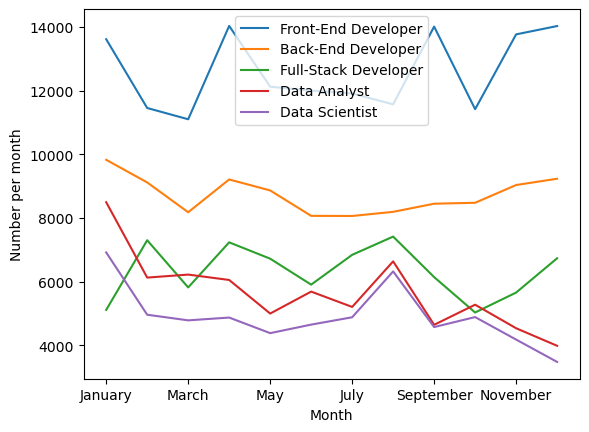

In [114]:
df_merge[top_5].plot(kind='line')
plt.xlabel('Month')
plt.ylabel('Number per month')

plt.legend()
plt.show()

In [ ]:
"""""""""Example 3
Now looking at our dataset. Let's create two DataFrames.

The first one will get the count of Data Analyst jobs by month.
The second one will (similarly) get the count of Senior Data Analyst jobs by month.
Finally, we will merge these two DataFrames to easily compare the demand for Data Analyst vs Senior Data Analyst jobs.
"""""



In [3]:
## 1. Find df filtered per job_title_short = 'DAta Analyst', and then find the total of aggregated jobs per month
#you need to create a month column and make a pivot table

df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()


df_DA

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
12,Data Analyst,Stagiaire Data Analyst (H/F) - Lyon (69006),"Lyon, France",via Jobijoba,Full-time and Internship,False,France,2023-12-22 13:24:41,False,False,France,None,NaN,NaN,Engie,"['sql', 'php', 'excel', 'power bi', 'sap', 'ji...","{'analyst_tools': ['excel', 'power bi', 'sap']..."
18,Data Analyst,Data Analyst,"Warsaw, Poland",via Praca Trabajo.org,Full-time,False,Poland,2023-10-16 13:36:54,False,False,Poland,None,NaN,NaN,Glovo,"['sql', 'python', 'r', 'redshift', 'pandas', '...","{'analyst_tools': ['excel', 'looker', 'tableau..."
31,Data Analyst,Stage - Data Analyst F/H,"Paris, France",via LinkedIn,Full-time and Internship,False,France,2023-10-19 13:59:31,False,False,France,None,NaN,NaN,GROUPE BON MARCHÉ : Le Bon Marché Rive Gauche ...,['sql'],{'programming': ['sql']}
34,Data Analyst,Data Analyst als Marketing Manager Automation ...,"Erlangen, Germany",via Central Illinois Proud Jobs,Full-time,False,Germany,2023-02-23 13:31:28,True,False,Germany,None,NaN,NaN,DEFACTO GmbH,['sap'],{'analyst_tools': ['sap']}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None
785705,Data Analyst,Expert Business Data Analyst - Now Hiring,"Oakland, CA",via Snagajob,Full-time,False,"California, United States",2023-01-09 06:00:25,False,False,United States,None,NaN,NaN,PG&E Corporation,"['sql', 'python', 'tableau']","{'analyst_tools': ['tableau'], 'programming': ..."
785715,Data Analyst,Amul Careers 2023 - Apply Online - Data Analys...,India,melalui Jobsleworld - Jobs In India - Job Vaca...,Pekerjaan tetap,False,India,2023-03-13 06:16:28,False,False,India,None,NaN,NaN,Amul,None,None
785717,Data Analyst,Data & Analytics Architect (w/m/x),"Erfurt, Jerman",melalui LinkedIn,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,NTT DATA DACH,"['aws', 'azure']","{'cloud': ['aws', 'azure']}"


In [4]:
##using pivot group the df_DA by month, but first create a column with name month

df_DA['month'] = df_DA['job_posted_date'].dt.month
df_DA


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,month
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
12,Data Analyst,Stagiaire Data Analyst (H/F) - Lyon (69006),"Lyon, France",via Jobijoba,Full-time and Internship,False,France,2023-12-22 13:24:41,False,False,France,None,NaN,NaN,Engie,"['sql', 'php', 'excel', 'power bi', 'sap', 'ji...","{'analyst_tools': ['excel', 'power bi', 'sap']...",12
18,Data Analyst,Data Analyst,"Warsaw, Poland",via Praca Trabajo.org,Full-time,False,Poland,2023-10-16 13:36:54,False,False,Poland,None,NaN,NaN,Glovo,"['sql', 'python', 'r', 'redshift', 'pandas', '...","{'analyst_tools': ['excel', 'looker', 'tableau...",10
31,Data Analyst,Stage - Data Analyst F/H,"Paris, France",via LinkedIn,Full-time and Internship,False,France,2023-10-19 13:59:31,False,False,France,None,NaN,NaN,GROUPE BON MARCHÉ : Le Bon Marché Rive Gauche ...,['sql'],{'programming': ['sql']},10
34,Data Analyst,Data Analyst als Marketing Manager Automation ...,"Erlangen, Germany",via Central Illinois Proud Jobs,Full-time,False,Germany,2023-02-23 13:31:28,True,False,Germany,None,NaN,NaN,DEFACTO GmbH,['sap'],{'analyst_tools': ['sap']},2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None,1
785705,Data Analyst,Expert Business Data Analyst - Now Hiring,"Oakland, CA",via Snagajob,Full-time,False,"California, United States",2023-01-09 06:00:25,False,False,United States,None,NaN,NaN,PG&E Corporation,"['sql', 'python', 'tableau']","{'analyst_tools': ['tableau'], 'programming': ...",1
785715,Data Analyst,Amul Careers 2023 - Apply Online - Data Analys...,India,melalui Jobsleworld - Jobs In India - Job Vaca...,Pekerjaan tetap,False,India,2023-03-13 06:16:28,False,False,India,None,NaN,NaN,Amul,None,None,3
785717,Data Analyst,Data & Analytics Architect (w/m/x),"Erfurt, Jerman",melalui LinkedIn,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,NTT DATA DACH,"['aws', 'azure']","{'cloud': ['aws', 'azure']}",3


In [5]:
df_DA_pivot = df_DA.pivot_table(values = 'job_title_short', index = 'month', aggfunc = 'count')
df_DA_pivot

,job_title_short
month,
1,23585
2,16558
3,16243
4,15514
5,13423
6,16008
7,16095
8,18628
9,14969


In [6]:
#Same we're gonna apply for Senior Data Analyst
#Filter df per title SDA, then create column month, and through pivot_table create a dataframe of counted jobs SDA through months

df_SDA = df[df['job_title_short'] == 'Senior Data Analyst'].copy()
df_SDA

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
25,Senior Data Analyst,"Senior Officer, Data Analyst, GTO",Singapore,via BeBee Singapore,Full-time,False,Singapore,2023-06-23 13:56:10,True,False,Singapore,None,NaN,NaN,United Overseas Bank,['sql'],{'programming': ['sql']}
45,Senior Data Analyst,Senior Data Analyst,"Leeds, UK",via My Stateline Jobs,Full-time,False,United Kingdom,2023-05-30 13:14:08,True,False,United Kingdom,None,NaN,NaN,Corecom Consulting,"['sql', 'python']","{'programming': ['sql', 'python']}"
64,Senior Data Analyst,Senior Data Analyst,"Berlin, Germany",via BeBee,Full-time,False,Germany,2023-11-25 13:13:39,True,False,Germany,None,NaN,NaN,Stepstone GmbH,None,None
106,Senior Data Analyst,Senior Data Analyst (1541),Israel,via LinkedIn,Full-time,False,Israel,2023-07-13 13:27:00,True,False,Israel,None,NaN,NaN,TCM Technologies LTD,['python'],{'programming': ['python']}
150,Senior Data Analyst,Senior Consultant Data & Analytics,Belgium,via LinkedIn,Full-time,False,Belgium,2023-12-09 13:44:56,False,False,Belgium,None,NaN,NaN,EY,['excel'],{'analyst_tools': ['excel']}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785417,Senior Data Analyst,Senior Statistical Data Analyst,"Bogotá, Bogota, Colombia","via Trabajo.org - Vacantes De Empleo, Trabajo",Full-time,False,Colombia,2023-09-27 06:23:40,True,False,Colombia,None,NaN,NaN,Inchcape Digital,"['python', 'r']","{'programming': ['python', 'r']}"
785542,Senior Data Analyst,Senior Data Analyst (Hybrid),"Owings Mills, MD",via LinkedIn,Full-time,False,"New York, United States",2023-01-26 06:00:25,False,False,United States,None,NaN,NaN,CareFirst BlueCross BlueShield,"['sql', 'excel', 'flow']","{'analyst_tools': ['excel'], 'other': ['flow']..."
785592,Senior Data Analyst,VP - Institutional Credit Management - Lending...,"Warsaw, Poland",via Trabajo.org,Full-time,False,Poland,2023-01-13 06:41:53,True,False,Poland,None,NaN,NaN,Citi,None,None
785625,Senior Data Analyst,Senior Data Analyst,"Fort Lauderdale, FL",via Trabajo.org,Full-time,False,"Florida, United States",2023-01-21 06:20:14,False,True,United States,None,NaN,NaN,The Farmer's Dog,"['excel', 'sheets']","{'analyst_tools': ['excel', 'sheets']}"


In [7]:
df_SDA['month'] = df_SDA['job_posted_date'].dt.month
df_SDA

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,month
25,Senior Data Analyst,"Senior Officer, Data Analyst, GTO",Singapore,via BeBee Singapore,Full-time,False,Singapore,2023-06-23 13:56:10,True,False,Singapore,None,NaN,NaN,United Overseas Bank,['sql'],{'programming': ['sql']},6
45,Senior Data Analyst,Senior Data Analyst,"Leeds, UK",via My Stateline Jobs,Full-time,False,United Kingdom,2023-05-30 13:14:08,True,False,United Kingdom,None,NaN,NaN,Corecom Consulting,"['sql', 'python']","{'programming': ['sql', 'python']}",5
64,Senior Data Analyst,Senior Data Analyst,"Berlin, Germany",via BeBee,Full-time,False,Germany,2023-11-25 13:13:39,True,False,Germany,None,NaN,NaN,Stepstone GmbH,None,None,11
106,Senior Data Analyst,Senior Data Analyst (1541),Israel,via LinkedIn,Full-time,False,Israel,2023-07-13 13:27:00,True,False,Israel,None,NaN,NaN,TCM Technologies LTD,['python'],{'programming': ['python']},7
150,Senior Data Analyst,Senior Consultant Data & Analytics,Belgium,via LinkedIn,Full-time,False,Belgium,2023-12-09 13:44:56,False,False,Belgium,None,NaN,NaN,EY,['excel'],{'analyst_tools': ['excel']},12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785417,Senior Data Analyst,Senior Statistical Data Analyst,"Bogotá, Bogota, Colombia","via Trabajo.org - Vacantes De Empleo, Trabajo",Full-time,False,Colombia,2023-09-27 06:23:40,True,False,Colombia,None,NaN,NaN,Inchcape Digital,"['python', 'r']","{'programming': ['python', 'r']}",9
785542,Senior Data Analyst,Senior Data Analyst (Hybrid),"Owings Mills, MD",via LinkedIn,Full-time,False,"New York, United States",2023-01-26 06:00:25,False,False,United States,None,NaN,NaN,CareFirst BlueCross BlueShield,"['sql', 'excel', 'flow']","{'analyst_tools': ['excel'], 'other': ['flow']...",1
785592,Senior Data Analyst,VP - Institutional Credit Management - Lending...,"Warsaw, Poland",via Trabajo.org,Full-time,False,Poland,2023-01-13 06:41:53,True,False,Poland,None,NaN,NaN,Citi,None,None,1
785625,Senior Data Analyst,Senior Data Analyst,"Fort Lauderdale, FL",via Trabajo.org,Full-time,False,"Florida, United States",2023-01-21 06:20:14,False,True,United States,None,NaN,NaN,The Farmer's Dog,"['excel', 'sheets']","{'analyst_tools': ['excel', 'sheets']}",1


In [8]:
df_SDA_pivot = df_SDA.pivot_table(values = 'job_title_short', index = 'month', aggfunc = 'count')
df_SDA_pivot

,job_title_short
month,
1,3696
2,2713
3,2454
4,2351
5,1925
6,2319
7,2380
8,2951
9,2194


In [10]:
#Now we will merge these two dataframes and create one dataframe

df_DA_SDA = df_DA_pivot.merge(df_SDA_pivot, on = 'month')
df_DA_SDA.columns = ['count_DA', 'count_SDA']
df_DA_SDA

,count_DA,count_SDA
month,,
1,23585,3696
2,16558,2713
3,16243,2454
4,15514,2351
5,13423,1925
6,16008,2319
7,16095,2380
8,18628,2951
9,14969,2194


<Axes: xlabel='month'>

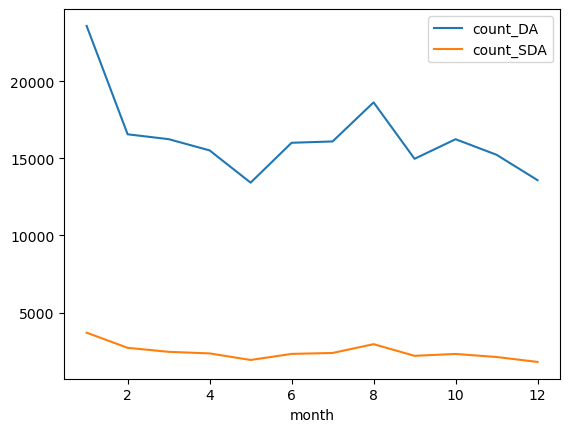

In [11]:
df_DA_SDA.plot(kind='line')